This is the implemetation of LinearRegression with Multiple Variables

## Import the libraries that will be used and get the defined data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    '''
    here we randomize data to simulate data 
    X (10000,5)
    Y (10000,1)
    '''
    rate = 0.7
    X = np.random.rand(10000,5)
    Y = np.random.randint(-1000,100,(10000,1))
    train_set_x_orig = X[:int(rate*len(X))][:]
    train_set_y = Y[:int(rate*len(X))][:]
    test_set_x_orig = X[int(rate*len(X)):][:]
    test_set_y = Y[int(rate*len(X)):][:]

    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y

# Loading the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()


# process the data  normalize the attribute of x  here we omit it .
train_set_x = train_set_x_orig.reshape((5,-1))
test_set_x = test_set_x_orig.reshape((5,-1))
train_set_y = train_set_y.reshape((1,-1))
test_set_y = test_set_y.reshape((1,-1))

print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))



## 注意：多变量线性回归之前必须要Feature Scaling

train_set_x shape: (5, 7000)
train_set_y shape: (1, 7000)
test_set_x shape: (5, 3000)
test_set_y shape: (1, 3000)


## First part: Initialize the parameters(w,b) of the model

In [3]:
def initilize_param(feature_num):
    w = np.zeros((feature_num, 1))
    b = 0
    return w, b

w,b = initilize_param(train_set_x.shape[0])
print ("w shape: " + str(w.shape))
print ("b : " + str(b))

w shape: (5, 1)
b : 0


## Second part : make propagations



$$\hat{Y} = w^T X + b $$


for each sample $x^{(i)}$:
$$ \mathcal{L}  = \frac{1}{2} ( \hat y^{(i)} - y^{(i)} ) ^2$$

Cost Function:
$$ J = \frac{1}{2m} \sum_{i=1}^m \mathcal{L}$$

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X (\hat{Y}-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat y^{(i)}-y^{(i)})$$

In [4]:
def propagate(w, b, X, Y):
    m = X.shape[1] # number of samples
    
    Y_hat = np.dot(w.T,X) + b
    
    cost = 1/(2*m) * np.sum(np.square(Y_hat-Y))     #   (1,m) 
    
    dw = 1/m*np.dot(X,(Y_hat-Y).T)  # (n,1) 
    db = 1/m * np.sum(Y_hat-Y)  
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost

## Third Part: use gradient descend to optimize param

In [5]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    for i in range(num_iterations):
        
        grads,cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        costs.append(cost)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
        
    return params, grads, costs


params, grads, costs = optimize(w, b, train_set_x, train_set_y, num_iterations=10000, learning_rate=0.1)

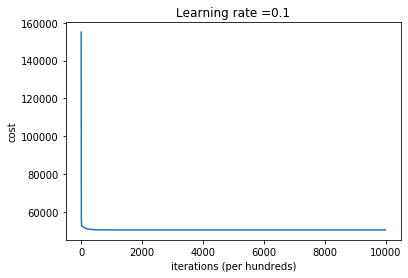

In [6]:
## we can visualize the cost to see if it's decresing
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.1))
plt.show()

## Fourth Part: predict y for x 

In [7]:
def predict(w, b, X):  
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.dot(w.T, X) + b

    return Y_prediction

## Final Part: Merge all functions and bulid a complete model

In [8]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.05):

 
    w, b = initilize_param(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###
    
    # Print train/test Errors
    print("train MSE: {} ".format(np.sum(Y_prediction_train-Y_train)))
    print("test MSE : {} ".format(np.sum(Y_prediction_test-Y_test)))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [9]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.05)

# this is the data problem 

train MSE: 1953.654306572429 
test MSE : -38752.55494358481 
